[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/omar-merhebi/hlc-python/blob/master/Lesson%205%20-%20Pandas/Lesson_5_TEACHER.ipynb)

# Lesson 5: Pandas as a dataframe API 

## Learning objectives

Students will gain a better understanding of how to use pandas for manipulating data frames

Specific coding skills learned:
- Subsetting data frames
- Joining data frames together 
- Other useful pandas functions (incuding groupby, statistics, and conditional subsetting)

In [20]:
%pip install pandas 
%pip install matplotlib 
%pip install numpy 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Introduction

In our last class, we discussed the basics of how to use pandas to read in our data. When we load in data from a CSV file with Pandas using a function such as reas_csv, we get a data structure known as a data frame. Basically, this is a two-dimensional table of rows and columns. 

This is useful in terms of allowing us to visualize our data, but most users will want to utilize the data for their own research purposes. Therefore, users will find it helpful to use pandas as an application programming interface (or API), which is basically a set of functions that allow users access to the features of the data. 

For this class, we are going to be using daily weather history data from multiple U.S. cities from July 2014 - June 2015 (downloaded from FiveThirtyEight's public repository of data found here: https://github.com/fivethirtyeight/data/tree/master/us-weather-history). 

The first set of data we are going to read in is from Philadelphia.

In [21]:
!wget https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KPHL.csv
philly_weather = pd.read_csv('KPHL.csv',index_col='date')
philly_weather.head()

zsh:1: command not found: wget


,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
date,,,,,,,,,,,,
2014-7-1,83,72,93,68,86,52,102,1988,1901,0.00,0.13,1.04
2014-7-2,86,75,96,68,86,52,103,1965,1901,0.21,0.13,1.73
2014-7-3,83,74,92,68,87,54,104,1957,1966,0.09,0.12,3.66
2014-7-4,73,68,78,68,87,52,103,1986,1966,0.04,0.13,2.08
2014-7-5,74,64,83,69,87,55,100,1963,1999,0.00,0.13,4.38


### Subsetting Data Frames

The rows of this data frame represent each day during this period, and the columns represent the weather data that has been collected.

As you can see, there are numerous types of data that has been collected, including the temperatures that occurred that day, what the average temperatures have been for that day over the years, the records for that day, and the amount of precipitation that occurred both on that day and on average for that day. 

##### Question 1: Let's say that you do not care about the temperature data, so most of these columns are not neccessary. How can you get the data you want to have? 

##### Answer: You can subset the data frame to only contain the columns you need

In pandas, one of the ways you can select certain subsets of the data is to specify them by the row and/or column names.  

To select a particular column (for example, the actual preciptation for each day) , you use square brackets [] along with the column name of the column of interest in quotation marks. Alternatively, this is known as "slicing", since you are taking a slice of the original data frame.

In [22]:
philly_weather["actual_precipitation"]

date
2014-7-1     0.00
2014-7-2     0.21
2014-7-3     0.09
2014-7-4     0.04
2014-7-5     0.00
             ... 
2015-6-26    0.00
2015-6-27    1.34
2015-6-28    0.22
2015-6-29    0.00
2015-6-30    1.50
Name: actual_precipitation, Length: 365, dtype: float64

In order to get both columns of precipitation data, we need to use double brackets, then within the brackets we list the columns of interest with a comma between them, as shown below. 

In [23]:
philly_weather[["actual_precipitation","average_precipitation","record_precipitation"]]

,actual_precipitation,average_precipitation,record_precipitation
date,,,
2014-7-1,0.00,0.13,1.04
2014-7-2,0.21,0.13,1.73
2014-7-3,0.09,0.12,3.66
2014-7-4,0.04,0.13,2.08
2014-7-5,0.00,0.13,4.38
...,...,...,...
2015-6-26,0.00,0.12,2.77
2015-6-27,1.34,0.10,3.27
2015-6-28,0.22,0.11,2.48


Another way of selecting these columns is to add to the end of our data frame object ".loc" (which looks for the names of the columns by labels). Since our matrix is rows by columns, the ":" symbol tells the computer that we want all of the rows, but only the columns with specific labels. 

In [24]:
philly_weather.loc[:,["actual_precipitation","average_precipitation","record_precipitation"]]

,actual_precipitation,average_precipitation,record_precipitation
date,,,
2014-7-1,0.00,0.13,1.04
2014-7-2,0.21,0.13,1.73
2014-7-3,0.09,0.12,3.66
2014-7-4,0.04,0.13,2.08
2014-7-5,0.00,0.13,4.38
...,...,...,...
2015-6-26,0.00,0.12,2.77
2015-6-27,1.34,0.10,3.27
2015-6-28,0.22,0.11,2.48


Likewise, we can do the same for the rows, only placing the ":" after the comma (in the columns position), and selecting the rows by label before the comma, as shown below. 

In [25]:
philly_weather.loc[["2014-7-1"],:]

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
date,,,,,,,,,,,,
2014-7-1,83,72,93,68,86,52,102,1988,1901,0.0,0.13,1.04


In [26]:
philly_weather.loc[["2014-7-1","2014-7-2"],:]

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
date,,,,,,,,,,,,
2014-7-1,83,72,93,68,86,52,102,1988,1901,0.00,0.13,1.04
2014-7-2,86,75,96,68,86,52,103,1965,1901,0.21,0.13,1.73


While this is not too difficult if we only need a handful of rows and/or columns, this could become time-consuming if we want to get a series of rows and/or columns.

##### Question 2: Instead of using the labels of the rows/columns, what is another attribute you can use to subset the data? 

##### Answer: You can use their numerical location (ex: the 1st row or 2nd column) 

A little earlier in the lesson, we used ".loc" to select rows and columns by their label. To do this by their index, we can instead use ".iloc" to select the row and/or column index value(s). 

Given that the "actual_precipitation" and "average_precipitation" columns represent the 9th through 11th rows respectively, this is how we subset the data to obtain the values in these columns .

(note: the first piece of code means "select the data from the 9th column up to, but not including, the 12th column").

In [27]:
philly_weather.iloc[:,9:12]

,actual_precipitation,average_precipitation,record_precipitation
date,,,
2014-7-1,0.00,0.13,1.04
2014-7-2,0.21,0.13,1.73
2014-7-3,0.09,0.12,3.66
2014-7-4,0.04,0.13,2.08
2014-7-5,0.00,0.13,4.38
...,...,...,...
2015-6-26,0.00,0.12,2.77
2015-6-27,1.34,0.10,3.27
2015-6-28,0.22,0.11,2.48


In [28]:
philly_weather.iloc[0:2,:]

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
date,,,,,,,,,,,,
2014-7-1,83,72,93,68,86,52,102,1988,1901,0.00,0.13,1.04
2014-7-2,86,75,96,68,86,52,103,1965,1901,0.21,0.13,1.73


If the numbers are not in a sequence (ex: columns 0, 5, and 7), you can get the subset of the data like this

In [29]:
philly_weather.iloc[:,[0,5,7]]

,actual_mean_temp,record_min_temp,record_min_temp_year
date,,,
2014-7-1,83,52,1988
2014-7-2,86,52,1965
2014-7-3,83,54,1957
2014-7-4,73,52,1986
2014-7-5,74,55,1963
...,...,...,...
2015-6-26,76,51,1960
2015-6-27,67,50,1965
2015-6-28,73,54,1961


### Joining Data Frames 

Of course, we might not only be interested in the data from one city. Imagine that we want to do side-by-side comparisons of the average precipitation in Seattle vs. Philadelphia. 

Let's first read in the weather pattern data for Seattle as well.

In [30]:
!wget https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KSEA.csv
seattle_weather = pd.read_csv('KSEA.csv',index_col='date')
seattle_weather.head()

zsh:1: command not found: wget


,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
date,,,,,,,,,,,,
2014-7-1,77,60,94,54,73,45,94,1948,2014,0.0,0.03,0.75
2014-7-2,70,58,81,54,73,43,93,1954,2015,0.0,0.03,0.50
2014-7-3,64,57,71,54,74,44,92,1954,2015,0.0,0.03,0.47
2014-7-4,66,57,75,54,74,43,92,1949,2015,0.0,0.03,0.57
2014-7-5,66,56,76,55,74,47,91,1951,1958,0.0,0.03,0.64


Using what we learned earlier, we can subset our data to only look at the columns dealing with precipitation:

In [31]:
philly_weather_precip = philly_weather.iloc[:,9:12]
seattle_weather_precip = seattle_weather.iloc[:,9:12]

Rather than having to flip between both data frames, we can instead combine them into one separate data frame using the function "join". 

There are four different ways that we can join our data, which we will go through below: "left", "right", "inner", and "outer" 

For the sake of an example, let us sort our data such that Philadelphia's precipitation data is sorted by the lowest to highest record precipitation, while Seattle's precipitation data is sorted from the highest to lowest record precipitation.

In [32]:
philly_weather_precip_reordered = philly_weather_precip.sort_values(by=["record_precipitation"], axis=0, ascending=True)
philly_weather_precip_reordered

,actual_precipitation,average_precipitation,record_precipitation
date,,,
2015-4-29,0.00,0.12,0.85
2014-10-13,0.02,0.10,0.90
2015-2-25,0.00,0.10,0.90
2015-3-9,0.00,0.11,0.94
2014-11-30,0.00,0.12,0.96
...,...,...,...
2014-8-13,0.00,0.11,5.21
2014-10-8,0.00,0.11,5.53
2014-8-3,0.23,0.12,5.63


In [33]:
seattle_weather_precip_reordered = seattle_weather_precip.sort_values(by=["record_precipitation"], axis=0, ascending=False)
seattle_weather_precip_reordered

,actual_precipitation,average_precipitation,record_precipitation
date,,,
2014-10-20,0.46,0.12,5.02
2014-12-3,0.00,0.20,3.77
2014-11-20,0.14,0.23,3.41
2014-11-6,0.16,0.21,3.29
2015-2-8,0.14,0.13,3.06
...,...,...,...
2014-7-11,0.00,0.03,0.25
2014-7-28,0.00,0.02,0.22
2014-7-29,0.00,0.02,0.17


A left join indicates that we preserve the order of the data frame is getting another data frame joined to it (in this case, the Philadelphia precipitation data). Since the suffix names are the same for both dataframes, we use lsuffix and rsuffix to specify which columns came from which dataframe. 

(Note: 'left' is the default setting)

In [34]:
philly_weather_precip_reordered.join(seattle_weather_precip_reordered, how ='left', lsuffix = '_philly', rsuffix = '_seattle')

,actual_precipitation_philly,average_precipitation_philly,record_precipitation_philly,actual_precipitation_seattle,average_precipitation_seattle,record_precipitation_seattle
date,,,,,,
2015-4-29,0.00,0.12,0.85,0.00,0.07,1.06
2014-10-13,0.02,0.10,0.90,0.30,0.10,0.66
2015-2-25,0.00,0.10,0.90,0.16,0.13,0.98
2015-3-9,0.00,0.11,0.94,0.00,0.12,1.47
2014-11-30,0.00,0.12,0.96,0.00,0.22,1.50
...,...,...,...,...,...,...
2014-8-13,0.00,0.11,5.21,0.85,0.03,0.85
2014-10-8,0.00,0.11,5.53,0.00,0.08,1.16
2014-8-3,0.23,0.12,5.63,0.00,0.01,0.47


Likewise, a right join indicates that we preserve the order of the data frame that is being joined to the first data frame (in this case, the Seattle precipitation data).

In [35]:
philly_weather_precip_reordered.join(seattle_weather_precip_reordered, how ='right', lsuffix = '_philly', rsuffix = '_seattle')

,actual_precipitation_philly,average_precipitation_philly,record_precipitation_philly,actual_precipitation_seattle,average_precipitation_seattle,record_precipitation_seattle
date,,,,,,
2014-10-20,0.00,0.10,2.72,0.46,0.12,5.02
2014-12-3,0.11,0.12,1.60,0.00,0.20,3.77
2014-11-20,0.00,0.10,2.59,0.14,0.23,3.41
2014-11-6,0.52,0.09,1.41,0.16,0.21,3.29
2015-2-8,0.00,0.09,1.15,0.14,0.13,3.06
...,...,...,...,...,...,...
2014-7-11,0.00,0.14,1.92,0.00,0.03,0.25
2014-7-28,0.23,0.14,8.02,0.00,0.02,0.22
2014-7-29,0.00,0.14,3.53,0.00,0.02,0.17


If we want to order the dates lexographically, we can change the how parameter to 'outer' (or the union of the datasets). 

In [36]:
philly_weather_precip_reordered.join(seattle_weather_precip_reordered, how ='outer', lsuffix = '_philly', rsuffix = '_seattle')

,actual_precipitation_philly,average_precipitation_philly,record_precipitation_philly,actual_precipitation_seattle,average_precipitation_seattle,record_precipitation_seattle
date,,,,,,
2014-10-1,0.00,0.11,3.00,0.00,0.07,0.56
2014-10-10,0.00,0.11,2.10,0.01,0.09,1.02
2014-10-11,0.48,0.10,2.04,0.29,0.09,0.89
2014-10-12,0.00,0.11,1.62,0.00,0.09,0.70
2014-10-13,0.02,0.10,0.90,0.30,0.10,0.66
...,...,...,...,...,...,...
2015-6-5,0.13,0.13,2.31,0.00,0.06,0.63
2015-6-6,0.05,0.12,1.95,0.00,0.06,1.54
2015-6-7,0.00,0.13,3.50,0.00,0.06,0.81


When we combine these datasets together, we can easily compare data from both data frames, for example plotting the record precipitation in Seattle vs. Philadelphia

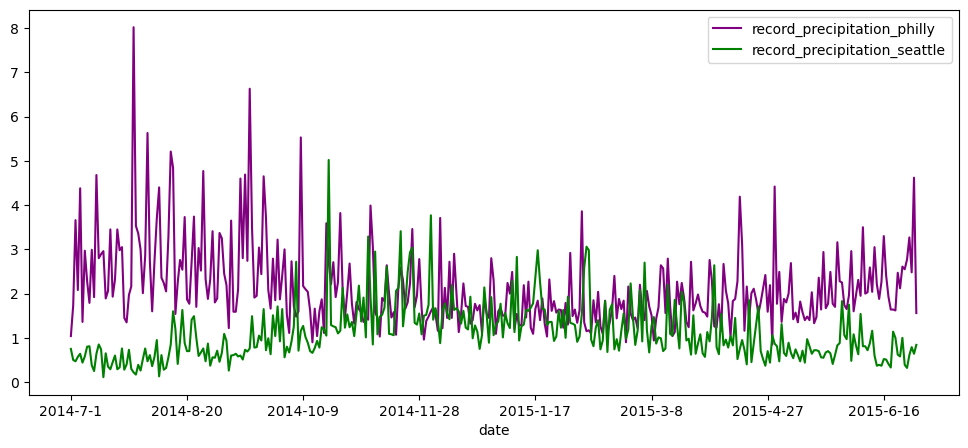

In [37]:
all_precipitation = philly_weather_precip.join(seattle_weather_precip,lsuffix = '_philly', rsuffix = '_seattle')
ax = plt.gca()
all_precipitation.plot(kind='line',y='record_precipitation_philly',ax=ax, color = 'purple',figsize=(12,5))
all_precipitation.plot(kind='line',y='record_precipitation_seattle',ax=ax, color = 'green',figsize=(12,5))
plt.show()

Let us pretend that we want to add information about each month (stored in the months object)

In [38]:
months = pd.Series(['July', 'August','September','October','November','December','January','February','March','April','May','June'])
months = months.repeat([31,31,30,31,30,31,31,28,31,30,31,30])
months = pd.DataFrame(months, columns = ['months'])
months.index = all_precipitation.index
months.index.name = 'date'
months

,months
date,
2014-7-1,July
2014-7-2,July
2014-7-3,July
2014-7-4,July
2014-7-5,July
...,...
2015-6-26,June
2015-6-27,June
2015-6-28,June


**Exercise:** Using the 'all_precipitation' and 'months' objects, how can we join these dataframes together and save it as a new object titled 'all_precip_wmonths'?

In [39]:
all_precip_wmonths = all_precipitation.join(months)
all_precip_wmonths

,actual_precipitation_philly,average_precipitation_philly,record_precipitation_philly,actual_precipitation_seattle,average_precipitation_seattle,record_precipitation_seattle,months
date,,,,,,,
2014-7-1,0.00,0.13,1.04,0.00,0.03,0.75,July
2014-7-2,0.21,0.13,1.73,0.00,0.03,0.50,July
2014-7-3,0.09,0.12,3.66,0.00,0.03,0.47,July
2014-7-4,0.04,0.13,2.08,0.00,0.03,0.57,July
2014-7-5,0.00,0.13,4.38,0.00,0.03,0.64,July
...,...,...,...,...,...,...,...
2015-6-26,0.00,0.12,2.77,0.00,0.03,0.32,June
2015-6-27,1.34,0.10,3.27,0.00,0.04,0.61,June
2015-6-28,0.22,0.11,2.48,0.01,0.04,0.79,June


Now, let us say that in addition to the rainfall data, we also started to collect information about the average dewpoint on each day for the first three months in Philadelphia. However, due to statewide budget cuts scientists could not afford to gather data for the rest of the year.

In [40]:
dewpoint = np.random.randint(40,70,size=92)
dewpoint = pd.DataFrame(dewpoint, columns=['dewpoint'])
dewpoint.index = all_precipitation.index[0:92]
dewpoint.index.name = 'date'
dewpoint

,dewpoint
date,
2014-7-1,62
2014-7-2,60
2014-7-3,67
2014-7-4,63
2014-7-5,42
...,...
2014-9-26,63
2014-9-27,46
2014-9-28,41


As done previously, we can join the datasets together, but you will notice below that all of the dates where there was no dewpoint recorded are labeled 'NaN' ("Not a number", or undefined, data points).

In [41]:
philly_weather_precip.join(dewpoint)

,actual_precipitation,average_precipitation,record_precipitation,dewpoint
date,,,,
2014-7-1,0.00,0.13,1.04,62.0
2014-7-2,0.21,0.13,1.73,60.0
2014-7-3,0.09,0.12,3.66,67.0
2014-7-4,0.04,0.13,2.08,63.0
2014-7-5,0.00,0.13,4.38,42.0
...,...,...,...,...
2015-6-26,0.00,0.12,2.77,NaN
2015-6-27,1.34,0.10,3.27,NaN
2015-6-28,0.22,0.11,2.48,NaN


What if you only want to keep the values where dewpoints are recorded? To do this, you can use join with the how parameter set to 'inner' (or intersection of the data), as shown below. 

In [42]:
philly_weather_precip.join(dewpoint, how='inner')

,actual_precipitation,average_precipitation,record_precipitation,dewpoint
date,,,,
2014-7-1,0.00,0.13,1.04,62
2014-7-2,0.21,0.13,1.73,60
2014-7-3,0.09,0.12,3.66,67
2014-7-4,0.04,0.13,2.08,63
2014-7-5,0.00,0.13,4.38,42
...,...,...,...,...
2014-9-26,0.00,0.13,2.79,63
2014-9-27,0.00,0.14,1.85,46
2014-9-28,0.00,0.13,3.22,41


### Other useful pandas functions: conditional subsetting 

There are other ways to subset datasets by their index or their rownames/colnames. 

Let us say that you are only looking for days where the max temperature was greater than 90. How would we be able to get only those rows?

To do this, we can do something called conditional subsetting.

Remember in lesson 1 when we learned about comparisons, such as "greater than" ( > ), "lesser than" ( < ),  "equals" (==)? We can subset our data this way as well. 

To pick the rows where the max temperature was greater than 90, we can subset the data as follows

In [43]:
philly_weather[philly_weather["actual_max_temp"] > 90]

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
date,,,,,,,,,,,,
2014-7-1,83,72,93,68,86,52,102,1988,1901,0.00,0.13,1.04
2014-7-2,86,75,96,68,86,52,103,1965,1901,0.21,0.13,1.73
2014-7-3,83,74,92,68,87,54,104,1957,1966,0.09,0.12,3.66
2014-7-7,84,74,93,69,87,55,103,1968,2010,0.00,0.13,2.97
2014-7-8,84,72,95,69,87,53,100,1960,1993,0.17,0.14,2.28
2014-7-13,82,72,91,69,87,57,98,1998,1994,0.05,0.14,2.80
2014-7-15,82,73,91,70,87,56,103,1940,1995,0.81,0.15,2.96
2014-7-23,83,72,93,70,87,58,101,1950,2011,0.05,0.14,3.05
2014-7-27,81,70,91,70,87,53,100,1962,1940,1.25,0.15,2.16


As another example, what if we wanted to get all the days where it did not rain?

In [44]:
philly_weather[philly_weather["actual_precipitation"] == 0.00]

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
date,,,,,,,,,,,,
2014-7-1,83,72,93,68,86,52,102,1988,1901,0.0,0.13,1.04
2014-7-5,74,64,83,69,87,55,100,1963,1999,0.0,0.13,4.38
2014-7-6,75,64,86,69,87,52,102,1960,2010,0.0,0.13,1.36
2014-7-7,84,74,93,69,87,55,103,1968,2010,0.0,0.13,2.97
2014-7-9,80,71,89,69,87,53,103,1963,1936,0.0,0.15,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-6-17,78,69,86,64,83,44,98,1964,1957,0.0,0.10,2.41
2015-6-22,82,73,91,66,85,48,100,1963,1988,0.0,0.11,2.47
2015-6-24,77,69,85,66,85,52,99,1947,1923,0.0,0.11,2.61


What if we want to omit years where the high occurred that year? (Hint: remember the boolean operators AND (&) and OR (|)

Answer:

In [45]:
philly_weather[(philly_weather["record_max_temp_year"] != 2014) & (philly_weather["record_max_temp_year"] != 2015)]

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
date,,,,,,,,,,,,
2014-7-1,83,72,93,68,86,52,102,1988,1901,0.00,0.13,1.04
2014-7-2,86,75,96,68,86,52,103,1965,1901,0.21,0.13,1.73
2014-7-3,83,74,92,68,87,54,104,1957,1966,0.09,0.12,3.66
2014-7-4,73,68,78,68,87,52,103,1986,1966,0.04,0.13,2.08
2014-7-5,74,64,83,69,87,55,100,1963,1999,0.00,0.13,4.38
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-6-26,76,68,84,67,85,51,100,1960,1952,0.00,0.12,2.77
2015-6-27,67,63,71,67,86,50,97,1965,1963,1.34,0.10,3.27
2015-6-28,73,66,79,67,86,54,97,1961,1963,0.22,0.11,2.48


### Other useful pandas functions: statistics

Lastly, we can perform statistics on our data as a whole. We have already gone through how certain mathematical functions such as min, max, or mean can be calculated on different groups, but this can also be done to columns of the data frame as well. 

For example, we can get the mean value of the actual precipitation in Seattle and Philadelphia, as shown below:

In [46]:
all_precip_wmonths["actual_precipitation_seattle"].mean()

0.10254794520547947

In [47]:
all_precip_wmonths["actual_precipitation_philly"].mean()

0.12454794520547946

As you can see, on average the daily precipitation in Philadelphia is only 0.02 inches greater than Seattle. 

If you wanted to look at both at the same time, we follow the same rules that we did in label-based subsetting:

In [48]:
all_precip_wmonths[["actual_precipitation_seattle","actual_precipitation_philly"]].mean()

actual_precipitation_seattle    0.102548
actual_precipitation_philly     0.124548
dtype: float64

In general, if you wanted to look at multiple statistics at once, you can call the function 'describe', as shown below:

In [49]:
all_precip_wmonths[["actual_precipitation_seattle","actual_precipitation_philly"]].describe()

,actual_precipitation_seattle,actual_precipitation_philly
count,365.000000,365.000000
mean,0.102548,0.124548
std,0.241871,0.304216
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.060000,0.050000
max,2.200000,2.010000


### Other useful pandas functions: groupby

Let us go back to to the all_precip_wmonths object, when we added information about which month each day was in for the combined Philly and Seattle precipitation data. One neat thing we can do is to group data based on certain column values (such as months), as shown below. 

In [50]:
all_precip_wmonths.groupby(["months"])

We can do functions such as mean, min, and max for each month, rather than every day. 

In [51]:
all_precip_wmonths.groupby(["months"]).mean()

,actual_precipitation_philly,average_precipitation_philly,record_precipitation_philly,actual_precipitation_seattle,average_precipitation_seattle,record_precipitation_seattle
months,,,,,,
April,0.119333,0.118667,2.015000,0.067667,0.090333,0.972333
August,0.114516,0.112903,2.921290,0.058387,0.028387,0.749355
December,0.105484,0.114839,1.767742,0.154516,0.172581,1.521935
February,0.084286,0.094643,1.656786,0.188214,0.125000,1.393571
January,0.145806,0.097742,1.633226,0.118065,0.179677,1.580968
July,0.138710,0.140323,2.758065,0.024839,0.022581,0.483871
June,0.296000,0.114333,2.376667,0.007667,0.052333,0.737333
March,0.178065,0.122258,1.755806,0.144194,0.120000,1.179355
May,0.038387,0.119677,1.879355,0.018710,0.062581,0.747742


In [52]:
all_precip_wmonths.groupby(["months"]).min()

,actual_precipitation_philly,average_precipitation_philly,record_precipitation_philly,actual_precipitation_seattle,average_precipitation_seattle,record_precipitation_seattle
months,,,,,,
April,0.0,0.10,0.85,0.0,0.07,0.37
August,0.0,0.09,1.54,0.0,0.01,0.13
December,0.0,0.09,1.09,0.0,0.16,0.75
February,0.0,0.09,0.90,0.0,0.11,0.68
January,0.0,0.09,1.03,0.0,0.15,0.93
July,0.0,0.12,1.04,0.0,0.01,0.11
June,0.0,0.10,1.56,0.0,0.03,0.32
March,0.0,0.10,0.94,0.0,0.11,0.57
May,0.0,0.10,1.33,0.0,0.06,0.41


In [53]:
all_precip_wmonths.groupby(['months']).max()

,actual_precipitation_philly,average_precipitation_philly,record_precipitation_philly,actual_precipitation_seattle,average_precipitation_seattle,record_precipitation_seattle
months,,,,,,
April,2.01,0.14,4.42,0.55,0.11,2.64
August,1.11,0.13,5.63,0.85,0.04,1.63
December,1.02,0.13,3.71,0.81,0.20,3.77
February,0.93,0.10,3.86,1.03,0.14,3.06
January,1.84,0.11,2.49,1.03,0.20,2.98
July,1.25,0.15,8.02,0.76,0.03,0.85
June,1.96,0.13,4.62,0.18,0.07,1.75
March,0.95,0.14,2.79,2.20,0.14,2.70
May,0.60,0.13,3.16,0.24,0.07,1.83


Remember when we plotted the record precipitation in Philadelphia vs. Seattle? What if we instead plotted the mean month-to-month instead of daily?

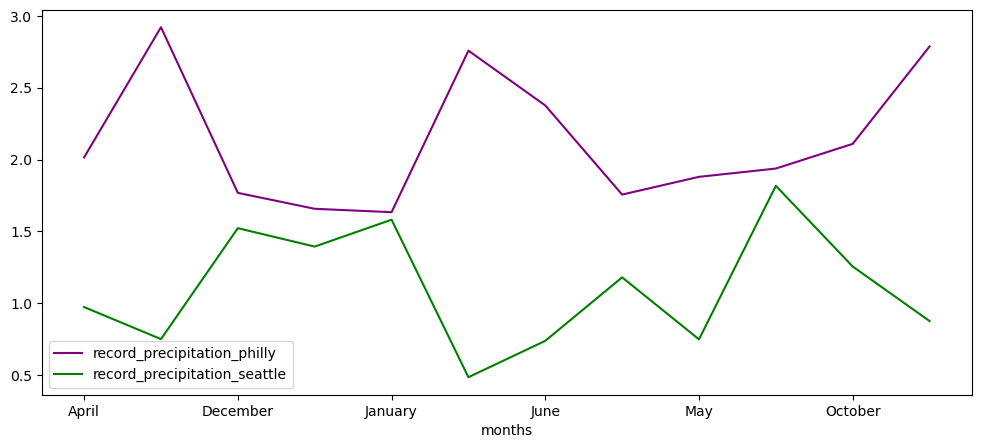

In [54]:
mean_months_precip = all_precip_wmonths.groupby(["months"]).mean()
ax2 = plt.gca()
mean_months_precip.plot(kind='line',y='record_precipitation_philly',ax=ax2, color = 'purple',figsize=(12,5))
mean_months_precip.plot(kind='line',y='record_precipitation_seattle',ax=ax2, color = 'green',figsize=(12,5))
plt.show()

From this graph, we can see that months where the record precipitation was on average the highest in Philadelphia (such as August and July) are the lowest precipitation times in Seattle!

## In-class exercises

##### In-class exercise 1: How would we select the precipitation data from July 1st and July 2nd, 2014, in Philadelphia, using label-based subsetting?

##### Answer:

In [55]:
philly_weather.loc[["2014-7-1","2014-7-2"],["actual_precipitation","average_precipitation","record_precipitation"]]

,actual_precipitation,average_precipitation,record_precipitation
date,,,
2014-7-1,0.00,0.13,1.04
2014-7-2,0.21,0.13,1.73


##### In-class exercise 2: What would we do to only select the precipitation data from July 1st and July 2nd, 2014 using index-based subsetting?

##### Answer:

In [56]:
philly_weather.iloc[0:2,9:12]

,actual_precipitation,average_precipitation,record_precipitation
date,,,
2014-7-1,0.00,0.13,1.04
2014-7-2,0.21,0.13,1.73


##### In-class exercise 3: Go back and use the philly_weather and seattle_weather objects to figure out which days had a record minimum tempeature under 10 in either dataset

##### Answer: 

In [57]:
all_weather = philly_weather.join(seattle_weather,lsuffix = '_philly', rsuffix = '_seattle')
all_weather[(all_weather["record_min_temp_philly"] < 10) | (all_weather["record_min_temp_seattle"] < 10)]

,actual_mean_temp_philly,actual_min_temp_philly,actual_max_temp_philly,average_min_temp_philly,average_max_temp_philly,record_min_temp_philly,record_max_temp_philly,record_min_temp_year_philly,record_max_temp_year_philly,actual_precipitation_philly,...,actual_max_temp_seattle,average_min_temp_seattle,average_max_temp_seattle,record_min_temp_seattle,record_max_temp_seattle,record_min_temp_year_seattle,record_max_temp_year_seattle,actual_precipitation_seattle,average_precipitation_seattle,record_precipitation_seattle
date,,,,,,,,,,,,,,,,,,,,,
2014-11-14,39,35,43,40,57,19,76,1986,1955,0.00,...,45,40,51,9,65,1955,1995,0.00,0.23,2.61
2014-11-15,38,32,44,39,56,19,81,1942,1993,0.00,...,47,40,51,6,62,1955,2001,0.00,0.23,1.09
2014-11-30,51,42,59,35,50,8,73,1875,1933,0.00,...,37,37,48,21,59,1985,2012,0.00,0.22,1.50
2014-12-3,44,40,48,34,49,9,68,1976,1950,0.11,...,50,36,47,27,60,1994,1965,0.00,0.20,3.77
2014-12-9,41,37,45,32,47,6,70,1876,1966,0.66,...,61,36,46,18,61,2009,2014,0.39,0.17,1.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-3-10,46,32,59,33,51,7,76,1984,2006,0.71,...,56,39,53,20,68,1956,1979,0.03,0.12,0.87
2015-3-13,40,30,49,33,52,8,84,1888,1990,0.08,...,63,39,53,28,70,1967,1979,0.08,0.12,0.70
2015-3-19,37,28,46,35,54,9,78,1876,1918,0.00,...,60,40,54,27,63,1965,1951,0.00,0.11,1.27


##### In-class exercise 4: Using the all_precip_wmonths object, how would you find the differences in standard deviation in average precipitation between Philadelphia and Seattle for each month? (Hint: you may want to use the pandas function "values" at  some point in this answer)

##### Answer:

In [58]:
standard_dev_both = all_precip_wmonths[["actual_precipitation_philly","actual_precipitation_seattle","months"]].groupby(["months"]).std()
standard_dev_philly = all_precip_wmonths[["actual_precipitation_philly","months"]].groupby(["months"]).std()
standard_dev_seattle = all_precip_wmonths[["actual_precipitation_seattle","months"]].groupby(["months"]).std()
standard_dev_philly.values - standard_dev_seattle.values

array([[ 0.25826309],
       [ 0.09860588],
       [ 0.02051835],
       [-0.07085852],
       [ 0.12008079],
       [ 0.19032769],
       [ 0.46993607],
       [-0.11348218],
       [ 0.06538403],
       [ 0.01278409],
       [-0.14322474],
       [-0.0237603 ]])

## Homework 

There are 81 different exercises pertaining to manipulating Pandas data frames found here: https://www.w3resource.com/python-exercises/pandas/index-dataframe.php (with the predicted output as well as possible solutions to the problems). 

I would suggest doing problems 3, 4, 5, 7, 9, 10, 12, 13, 14, 15, 24, and 31 (and if you have time/interest, problems 33, 44, 45, 49, and 52 are also good choices)